In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('c:/mysql/auto-mpg.csv', header=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df = df.drop(['horsepower','origin','car_name'], axis=1, inplace =False)
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [3]:
df.shape

(398, 6)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
y = df['mpg']
X = df.drop(['mpg'], axis=1, inplace=False)  # mpg는 column이다 and 원본은 건들지 않음
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
lr = LinearRegression().fit(X_train, y_train)

In [7]:
y_answer = lr.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_answer)
rmse = np.sqrt(mse)

In [9]:
np.round(lr.coef_,2) # 계수를 소수 둘째자리까지, 5가지 학습해서 5개 나옴

array([-0.07,  0.01, -0.01,  0.2 ,  0.75])

In [10]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model_year
254,6,200.0,2965,15.8,78
246,4,78.0,1985,19.4,78


In [11]:
np.round(lr.intercept_,2)

-17.09

In [12]:
import seaborn as sns

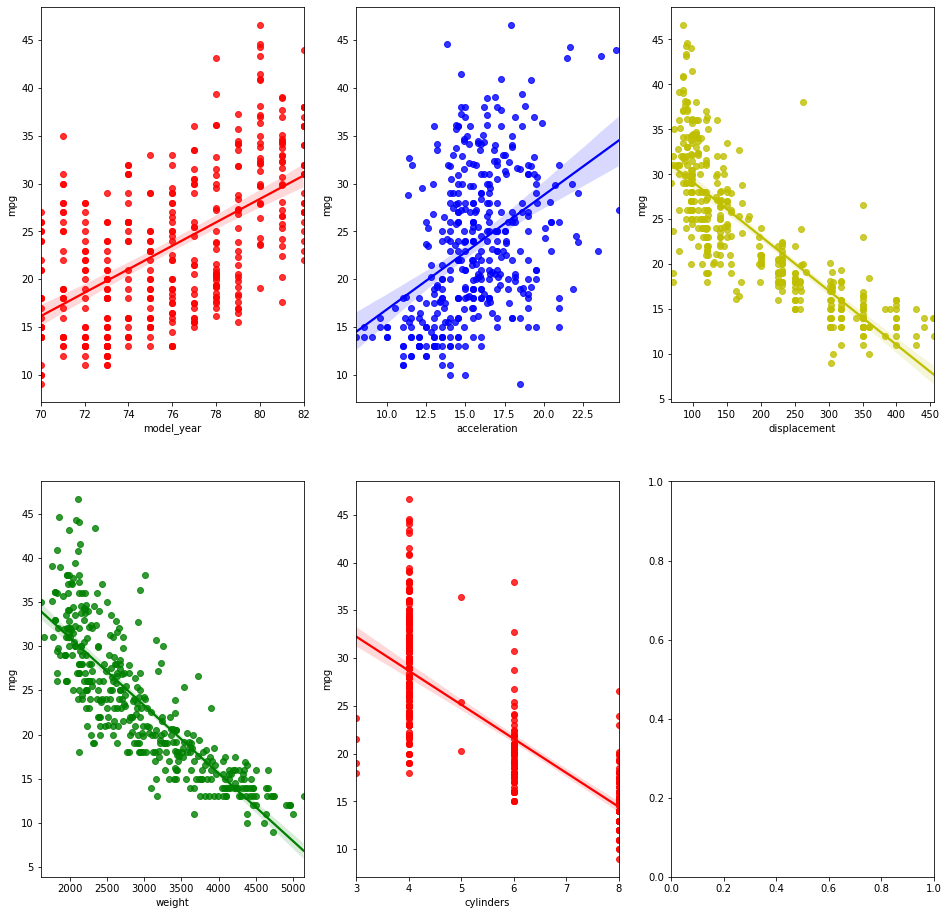

In [13]:
fig, axes = plt.subplots(2,3, figsize=(16,16))
x_features = ['model_year','acceleration','displacement','weight','cylinders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row= int(i/3)
    col=i%3
    sns.regplot(x= feature, y='mpg', data=df, ax=axes[row][col], color=plot_color[i])

In [14]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [15]:
!pip install pandas ==0.24.2

ERROR: Invalid requirement: '==0.24.2'


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target,random_state=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler #어떻게 좌표이동을 시킬것인지(얼마만큼 압축하고 옮길것인지)
scaler = MinMaxScaler()
scaler.fit(X_train) # 답을 다 주지 않고 X_train만 준다(문제만 주고 분포가 어떻게 되어있는지 판단해서 공부하도록 함(y_train은 사용 X))

MinMaxScaler()

In [18]:
X_train_s = scaler.transform(X_train)

In [19]:
print(X_train.shape,X_train_s.shape)

(426, 30) (426, 30)


In [20]:
print(X_train.min(axis=0),X_train_s.min(axis=0)) # MinMaxScaler로 scale한 결과 : 다양한 최솟값이 있음 -> 모두 0으로 바뀜

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [21]:
print(X_train.max(axis=0),X_train_s.max(axis=0)) #30개의 다양한 항목들이 1로 바꼈다.(같은 비율로)

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [22]:
X_test_s = scaler.transform(X_test)

In [23]:
print(X_test.min(axis=0),X_test.min(axis=0)) # train훈련데이터 기준으로 0과 1사이 -> 최솟값은 0에 근사

[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02] [7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


In [24]:
print(X_test.max(axis=0),X_test.max(axis=0)) # 최댓값은 1에 근사

[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01] [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]


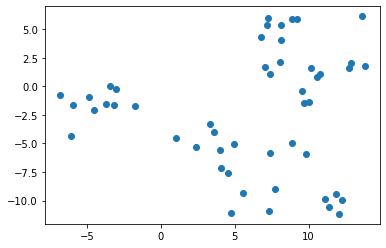

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [26]:
X_train, X_test = train_test_split(X,random_state=5, test_size=.1)

In [27]:
X_train.shape # test size는 9대1

(45, 2)

Text(0.5, 1.0, 'scaled bad')

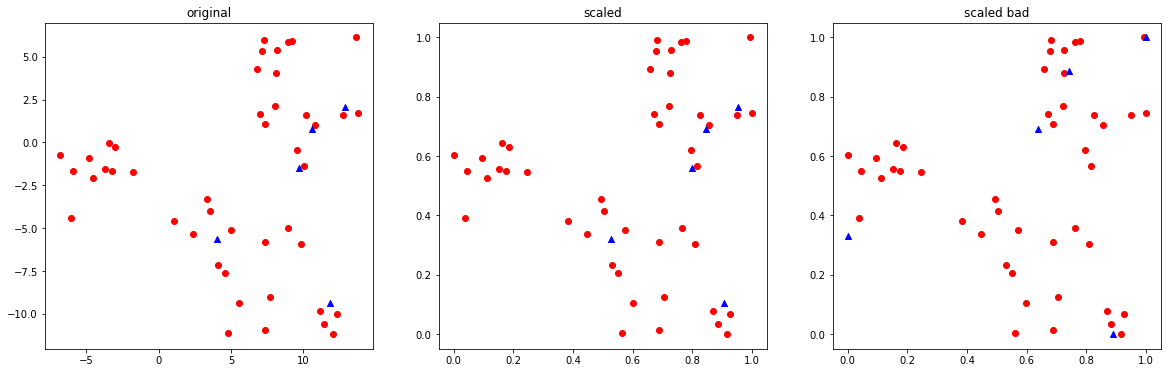

In [30]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
axes[0].scatter(X_train[:,0],X_train[:,1], c="r")
axes[0].scatter(X_test[:,0],X_test[:,1], c="b", marker='^')
axes[0].set_title("original")

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

axes[1].scatter(X_train_s[:,0],X_train_s[:,1], c="r")
axes[1].scatter(X_test_s[:,0],X_test_s[:,1], c="b", marker='^')
axes[1].set_title("scaled")

scaler = MinMaxScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

axes[2].scatter(X_train_s[:,0],X_train_s[:,1], c="r")
axes[2].scatter(X_test_s[:,0],X_test_s[:,1], c="b", marker='^')
axes[2].set_title("scaled bad") # 같은 기준으로 옮겨야 한다(훈련데이터 기준으로 scalering(재조정)함!)
#scalering이 bad가 나지 않도록 해야 성능이 확 늘어남